Name:

Register Number:

In [45]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
single_image= X_train[8]

In [9]:
single_image.shape

(28, 28)

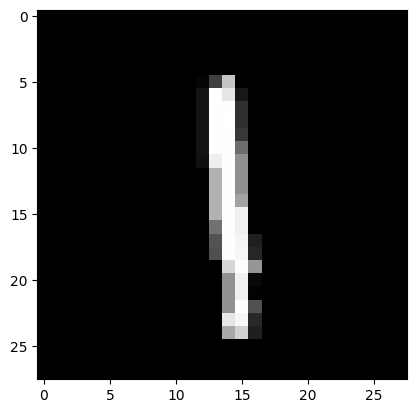

In [10]:
plt.imshow(single_image,cmap='gray')

In [11]:
y_train.shape

(60000,)

In [12]:
X_train.min()

0

In [13]:
X_train.max()

255

In [14]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [15]:
X_train_scaled.min()

0.0

In [16]:
X_train_scaled.max()

1.0

In [17]:
y_train[0]

5

In [18]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [19]:
type(y_train_onehot)

numpy.ndarray

In [20]:
y_train_onehot.shape

(60000, 10)

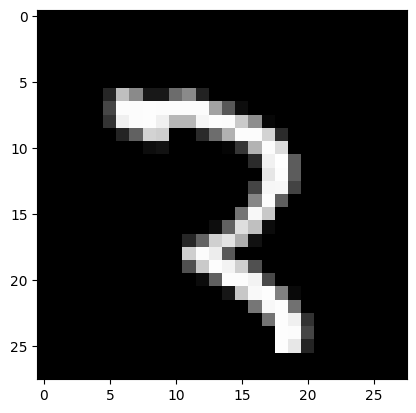

In [21]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [22]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name:

Register Number:

In [24]:

model = keras.Sequential()
model.add (layers.Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu'))
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (25, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 25)                825       
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                        

In [26]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [28]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0477 - val_accuracy: 0.9848
Epoch 2/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0531 - val_accuracy: 0.9833
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0481 - val_accuracy: 0.9846
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0577 - val_accuracy: 0.9837
Epoch 5/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0536 - val_accuracy: 0.9844


In [29]:
metrics = pd.DataFrame(model.history.history)

In [30]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.029752,0.990417,0.047707,0.9848
1,0.023110,0.992650,0.053130,0.9833
2,0.019085,0.994100,0.048075,0.9846
3,0.017091,0.994333,0.057681,0.9837
4,0.013347,0.995850,0.053606,0.9844


Manoj karthik R 
212222240061


<Axes: >

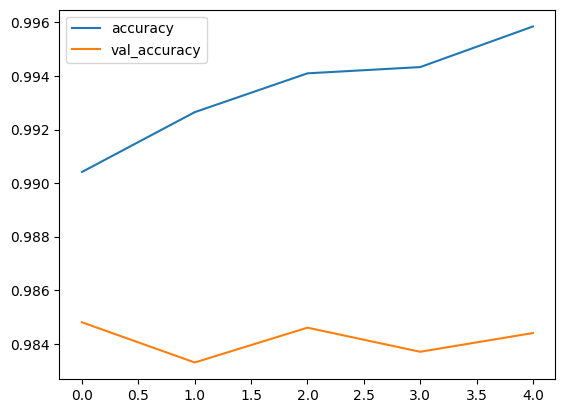

In [31]:
print("Manoj karthik R ")
print("212222240061")
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

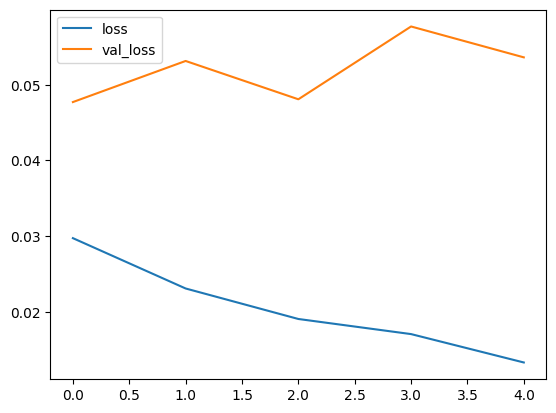

In [32]:
metrics[['loss','val_loss']].plot()

In [33]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [34]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 969    0    2    0    0    2    4    0    1    2]
 [   0 1127    3    0    0    0    3    1    1    0]
 [   0    2 1015    2    2    0    1    5    4    1]
 [   0    0    0  988    0   14    0    5    2    1]
 [   0    0    0    0  975    0    3    1    1    2]
 [   0    0    1    3    0  885    3    0    0    0]
 [   2    2    1    0    1    1  950    0    1    0]
 [   0    2   12    0    0    0    0 1011    2    1]
 [   4    0    0    1    0    5    2    1  959    2]
 [   2    3    0    4   11    9    0    6    9  965]]


In [47]:
print("MANOJ KARTHIK")
print(classification_report(y_test,x_test_predictions))

MANOJ KARTHIK
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [36]:
img = image.load_img('zero.png')

In [37]:
type(img)

PIL.Image.Image

In [38]:
img = image.load_img('zero.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [41]:
print(x_single_prediction)

[0]


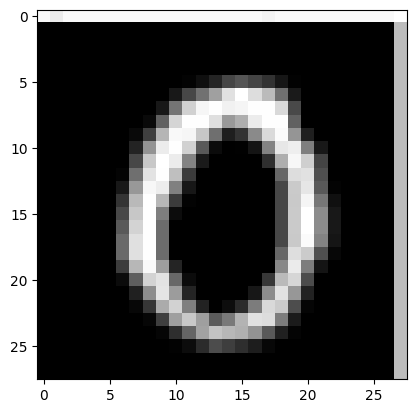

In [40]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [42]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [43]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [44]:
print(x_single_prediction)

[6]
